In [1]:
from datetime import datetime
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from vnstock3 import Vnstock
import pandas_ta as ta
import numpy as np
import F 

In [2]:
now = datetime.now()
current_date = now.strftime("%Y-%m-%d")
vn30 = Vnstock().stock(symbol='VN30', source='VCI')
data_VN30 = vn30.quote.history(start='2023-01-01', end = current_date, to_df=True)

vni = Vnstock().stock(symbol='VNINDEX', source='VCI')
data_VNI = vni.quote.history(start='2023-01-01', end = current_date, to_df=True)

2024-06-29 14:37:00,708 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-06-29 14:37:00,942 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


In [3]:
def model_ARIMA(data):
    data = data[['close']]
    stepwise_model = auto_arima(data['close'], trace=True, suppress_warnings=True, stepwise=True)
    model = ARIMA(data['close'], order=stepwise_model.order)
    model_fit = model.fit()
    return model_fit
def output_ARIMA(data, trend):
    data_features = data[['close']]
    if data_features.isnull().values.any():
        raise ValueError("Train data contains NaN values.")
    
    model = model_ARIMA(data_features)
    next_day_forecast = model.forecast(steps=10)
    
    return np.mean(next_day_forecast)

In [4]:
def test(data, k):
    # Ensure the 'Price' column is properly referenced
    data_output = data[['time', 'close']].copy()
    data_output['position'] = 0

    # Calculate predicted price for each row starting from index k
    for i in range(k, len(data)):
        # Get data for the previous k days to predict the price for the current day
        historical_data_arima = data.iloc[i-k:i][['close']]
        # Assuming output_ARIMA returns the predicted price based on previous data
        predicted_price_arima = output_ARIMA(historical_data_arima, k)
        # Calculate the price difference between the last day in the prediction data and the predicted price
        price_difference_arima = predicted_price_arima - data.iloc[i-1]['close']  # Make sure 'price' is correctly referenced
        # Update position based on calculated price difference
        if price_difference_arima > 2:
            data_output.loc[i, 'position'] = -1
        elif price_difference_arima < -2 :
            data_output.loc[i, 'position'] = 1
    data_output.dropna(inplace = True)
    return data_output

In [5]:
%%capture
data_VNI_position = test(data_VNI, 30)
data_VN30_position = test(data_VN30, 30)

Margin: 10.53677672980809
MDD: (66.12124661246602, 0.051205178202173025)

   Total trading quantity: 32
         Profit per trade: 2.8028124999999946
             Total Profit: 89.7
         Profit after fee: 76.5
 Trading quantity per day: 0.08672086720867209
 Profit per day after fee: 0.2073170731707317
                   Return: 0.03982238978835411
          Profit per year: 51.42265193370166
                  HitRate: 0.5
          HitRate per day: 0.16032608695652173


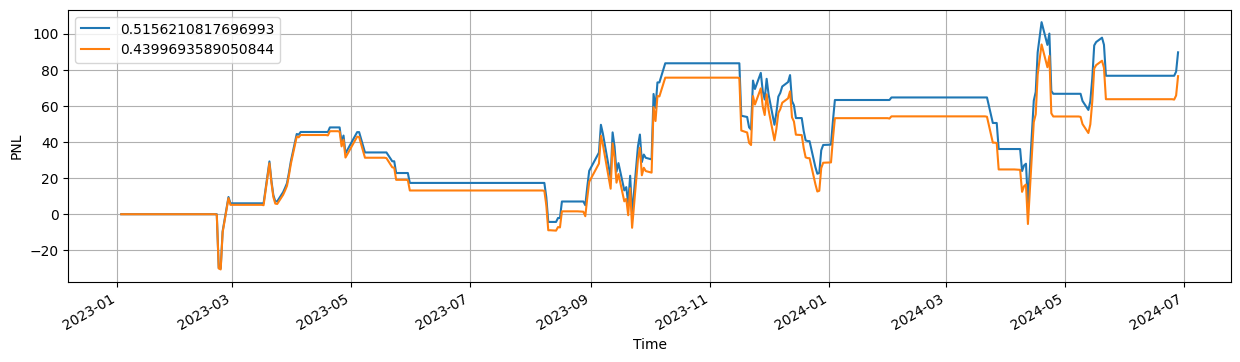

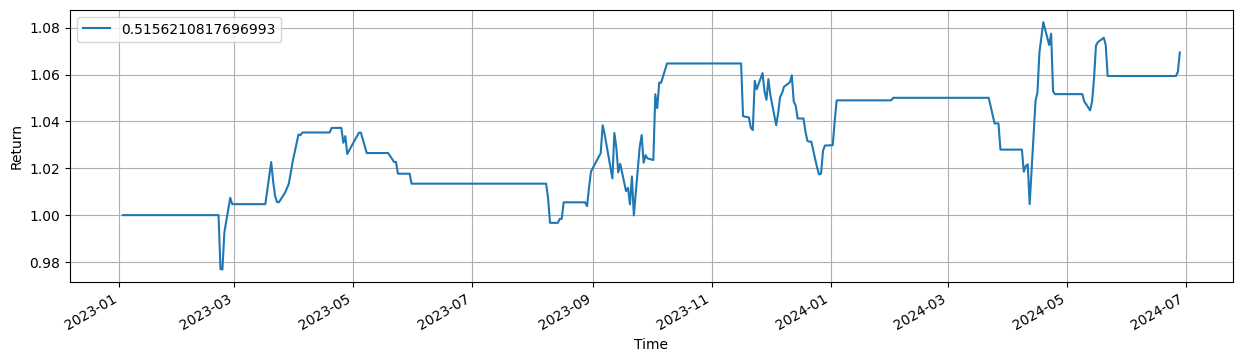

In [6]:
backtesting = F.BacktestInformation(data_VN30_position['time'], data_VN30_position['position'], data_VN30_position['close'])
backtest = backtesting.Plot_PNL()

Margin: 3.8929837184737988
MDD: (123.04593495934878, 0.09586600517276614)

   Total trading quantity: 39
         Profit per trade: 1.292051282051308
             Total Profit: 50.4
         Profit after fee: 34.1
 Trading quantity per day: 0.10569105691056911
 Profit per day after fee: 0.09241192411924119
                   Return: 0.01785849158827956
          Profit per year: 22.921731123388582
                  HitRate: 0.41025641025641024
          HitRate per day: 0.14130434782608695


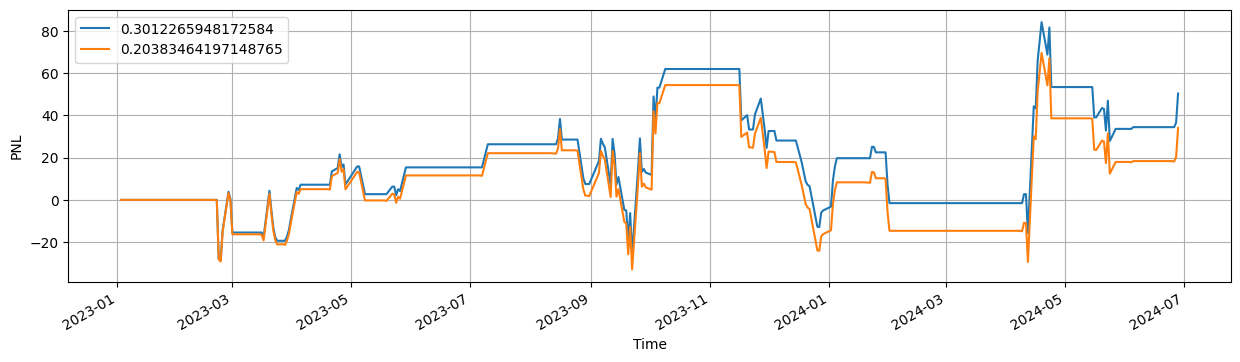

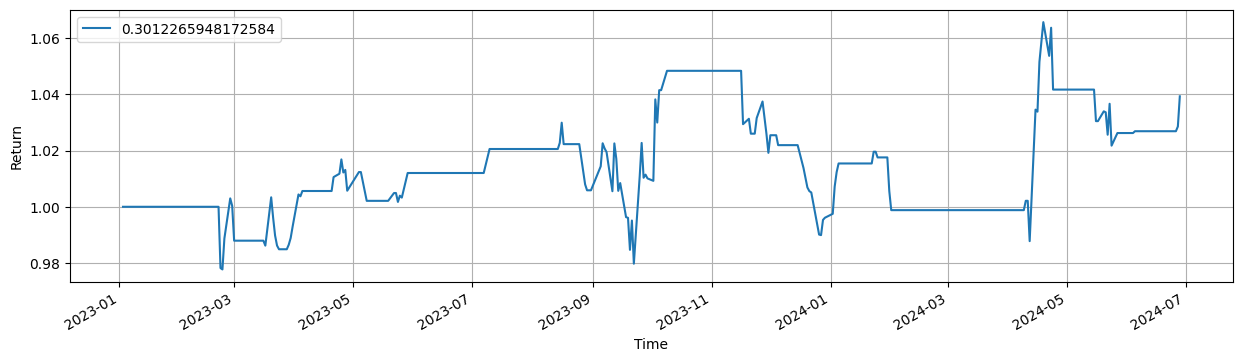

In [7]:
backtesting = F.BacktestInformation(data_VNI_position['time'], data_VNI_position['position'], data_VNI_position['close'])
backtest = backtesting.Plot_PNL()

In [8]:
%%capture
data_VNI_position = test(data_VNI, 15)
data_VN30_position = test(data_VN30, 15)

Margin: 15.83767637583893
MDD: (79.52902439024339, 0.06014173476983832)

   Total trading quantity: 63
         Profit per trade: 3.8295238095238058
             Total Profit: 241.3
         Profit after fee: 213.9
 Trading quantity per day: 0.17073170731707318
 Profit per day after fee: 0.5796747967479675
                   Return: 0.10873118360794423
          Profit per year: 143.78176795580112
                  HitRate: 0.5555555555555556
          HitRate per day: 0.29891304347826086


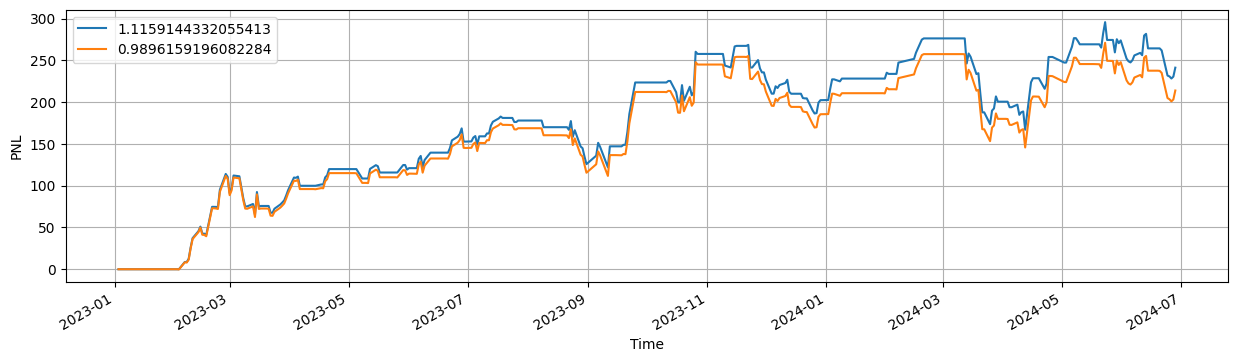

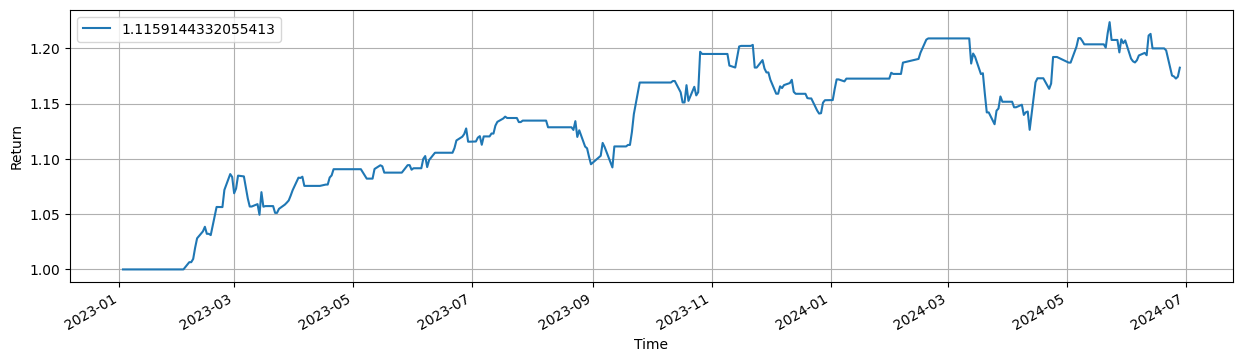

In [9]:
backtesting = F.BacktestInformation(data_VN30_position['time'], data_VN30_position['position'], data_VN30_position['close'])
backtest = backtesting.Plot_PNL()

Margin: 9.871383223858178
MDD: (100.58639566395561, 0.07836761068308684)

   Total trading quantity: 61
         Profit per trade: 2.286229508196729
             Total Profit: 139.5
         Profit after fee: 112.8
 Trading quantity per day: 0.16531165311653118
 Profit per day after fee: 0.3056910569105691
                   Return: 0.05907442378762272
          Profit per year: 75.8232044198895
                  HitRate: 0.5245901639344263
          HitRate per day: 0.26902173913043476


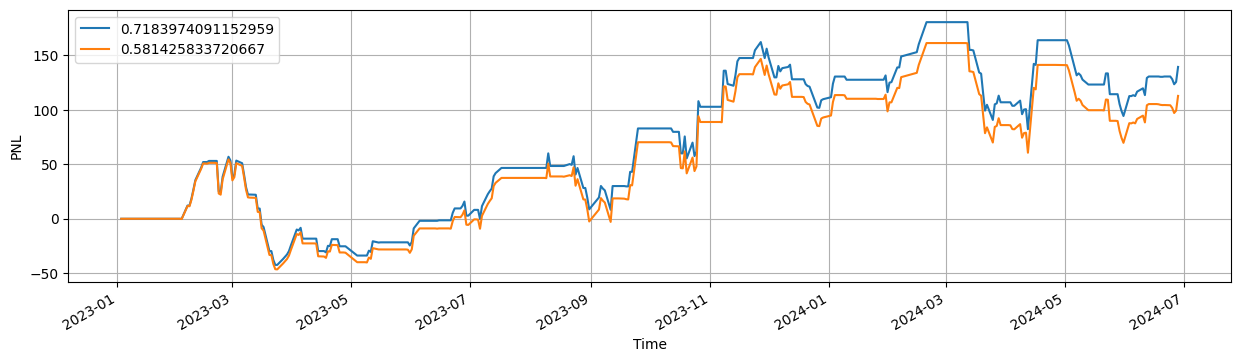

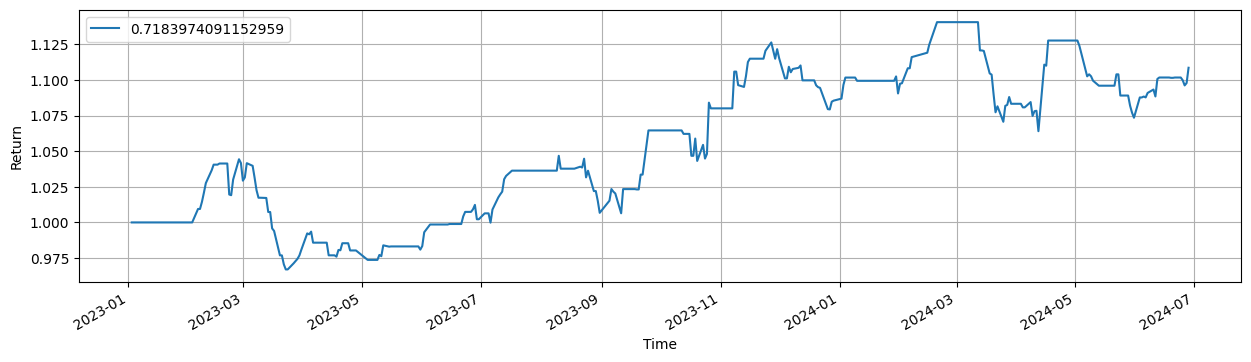

In [10]:
backtesting = F.BacktestInformation(data_VNI_position['time'], data_VNI_position['position'], data_VNI_position['close'])
backtest = backtesting.Plot_PNL()

In [11]:
%%capture
data_VNI_position = test(data_VNI, 7)
data_VN30_position = test(data_VN30, 7)

Margin: 9.394980748446878
MDD: (155.09878048780405, 0.11840595812457842)

   Total trading quantity: 65
         Profit per trade: 2.340615384615379
             Total Profit: 152.1
         Profit after fee: 123.8
 Trading quantity per day: 0.17615176151761516
 Profit per day after fee: 0.3355013550135501
                   Return: 0.06352999964415777
          Profit per year: 83.21731123388582
                  HitRate: 0.46153846153846156
          HitRate per day: 0.483695652173913


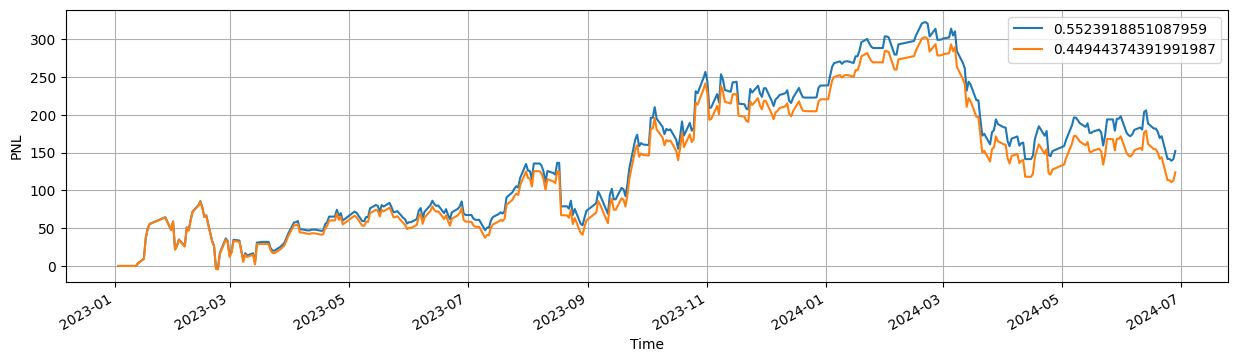

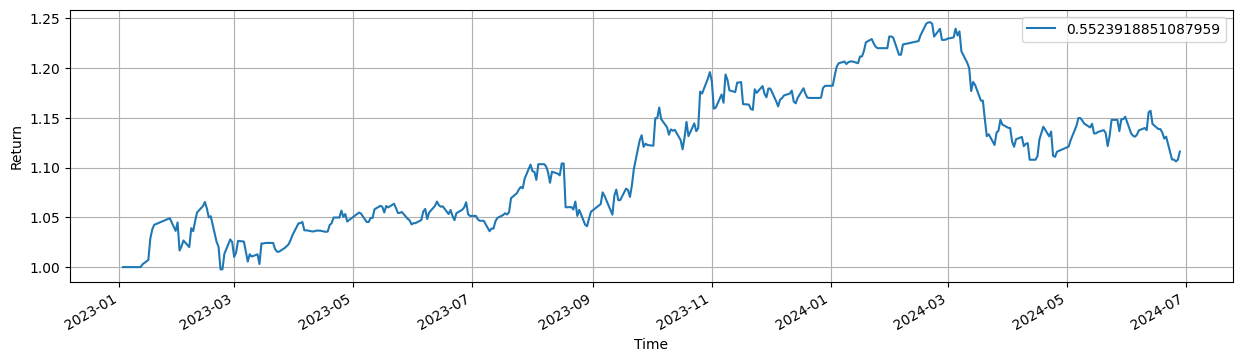

In [12]:
backtesting = F.BacktestInformation(data_VN30_position['time'], data_VN30_position['position'], data_VN30_position['close'])
backtest = backtesting.Plot_PNL()

Margin: 15.482610181256504
MDD: (143.14710027100196, 0.10998540178024138)

   Total trading quantity: 71
         Profit per trade: 3.7277464788732533
             Total Profit: 264.7
         Profit after fee: 233.5
 Trading quantity per day: 0.19241192411924118
 Profit per day after fee: 0.6327913279132791
                   Return: 0.12059586320142407
          Profit per year: 156.95672191528544
                  HitRate: 0.4788732394366197
          HitRate per day: 0.483695652173913


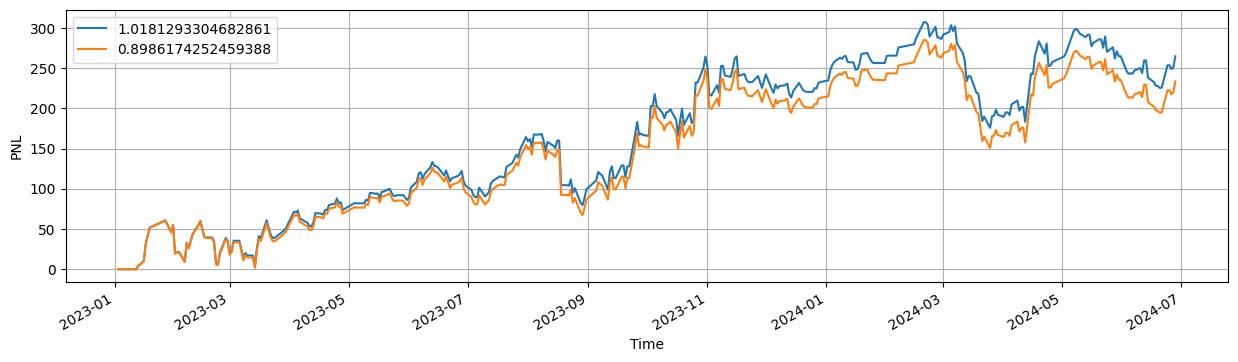

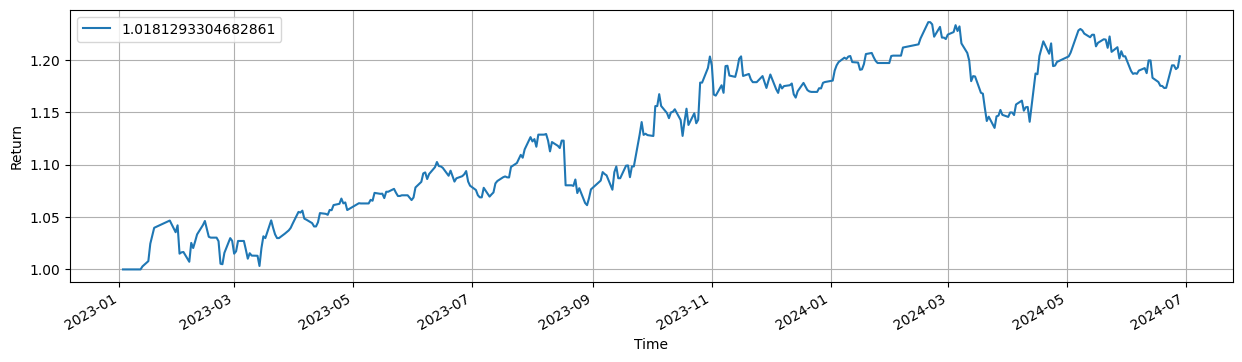

In [13]:
backtesting = F.BacktestInformation(data_VNI_position['time'], data_VNI_position['position'], data_VNI_position['close'])
backtest = backtesting.Plot_PNL()

In [14]:
%%capture
data_VNI_position = test(data_VNI, 3)
data_VN30_position = test(data_VN30, 3)

Margin: 6.997652509541474
MDD: (318.10807588075863, 0.23848864256157637)

   Total trading quantity: 121
         Profit per trade: 1.6245454545454596
             Total Profit: 196.6
         Profit after fee: 139.4
 Trading quantity per day: 0.32791327913279134
 Profit per day after fee: 0.37777777777777777
                   Return: 0.07025040227850936
          Profit per year: 93.7034990791897
                  HitRate: 0.5785123966942148
          HitRate per day: 0.45108695652173914


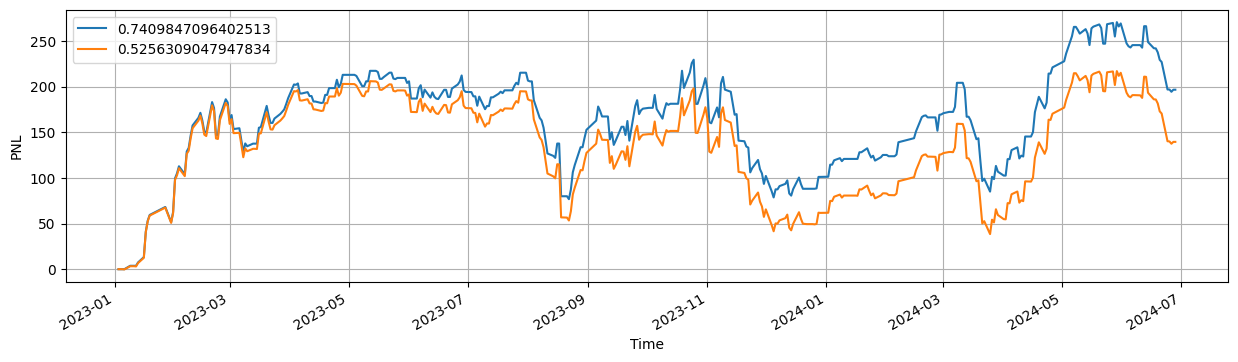

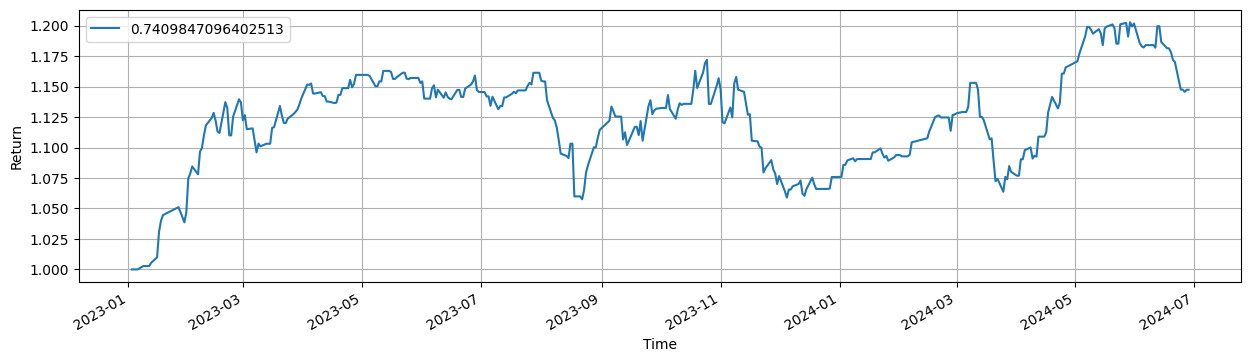

In [15]:
backtesting = F.BacktestInformation(data_VN30_position['time'], data_VN30_position['position'], data_VN30_position['close'])
backtest = backtesting.Plot_PNL()

Margin: 5.626063200653698
MDD: (246.50878048780413, 0.19099288004509604)

   Total trading quantity: 120
         Profit per trade: 1.3040833333333428
             Total Profit: 156.5
         Profit after fee: 99.9
 Trading quantity per day: 0.3252032520325203
 Profit per day after fee: 0.2707317073170732
                   Return: 0.05202873988057169
          Profit per year: 67.15193370165747
                  HitRate: 0.5416666666666666
          HitRate per day: 0.45108695652173914


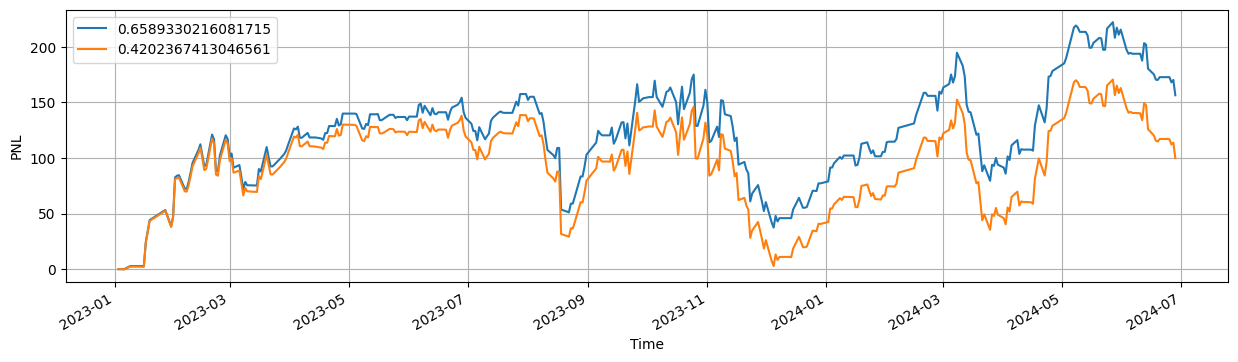

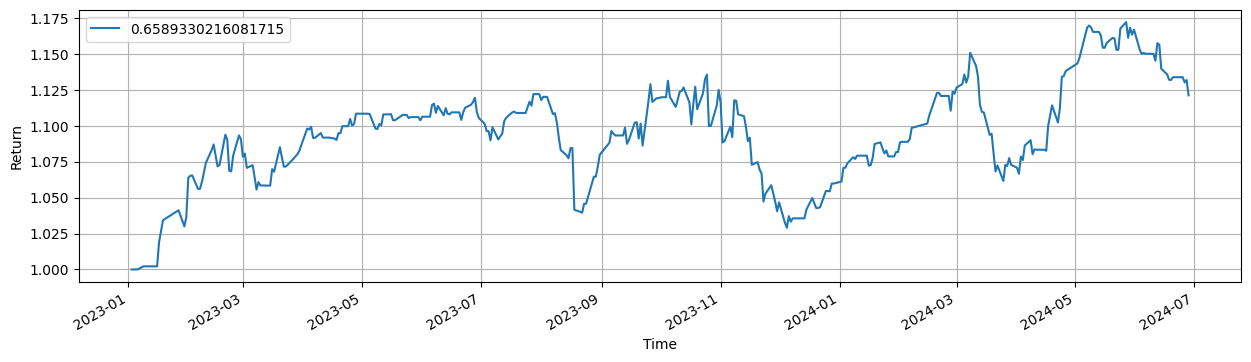

In [16]:
backtesting = F.BacktestInformation(data_VNI_position['time'], data_VNI_position['position'], data_VNI_position['close'])
backtest = backtesting.Plot_PNL()